### Import necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import glob
from PIL import Image
import os, os.path
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

### After running the cell below click the restart runtime button in the output and re-run all imports.

In [ ]:
!pip install easydev
!pip install colormap
!pip install opencv-python
!pip install colorgram.py
!pip install extcolors

import cv2
import extcolors

from colormap import rgb2hex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='path/to/folder'

### Two ways to collect filenames, the first option makes easier further steps.

In [ ]:
input_name = path + 'images_white_wines_clean'
filenames = []

# full name string
for f in os.listdir(input_name):
  ext = str(f)
  filenames.append(ext)

# clean name
'''
for f in os.listdir(input_name):
  ext = str(os.path.splitext(f)[0])
  filenames.append(ext)
'''

'\nfor f in os.listdir(input_name):\n  ext = str(os.path.splitext(f)[0])\n  filenames.append(ext)\n'

### Colors extraction: with tolerance sets up to 0 and limit to 1000 all singles colors are catched.

In [ ]:
colors = []

path='path/to/folder/images_white_wines_clean/'

for f in filenames:
    colors.append([f, extcolors.extract_from_path(path + f, tolerance = 0, limit = 1000)]) # with clean name add '.png' after f

### Create a list with all colors labeled by wine name.
### With the commented line only colors in a certain range are appended.

In [ ]:
colors_clean = []

for i in colors:
  for j in i[1][0]:
    #if ((j[-1] / colors[0][1][-1]) < 0.12) & ((j[-1] / colors[0][1][-1]) > 0.0012):
      colors_clean.append([i[0], j])

colors_clean = tuple(colors_clean)

In [ ]:
# Name
print('Name: ', colors_clean[0][0])
# R
print('R: ', colors_clean[0][1][0][0])
# G
print('G: ', colors_clean[0][1][0][1])
# B
print('B: ', colors_clean[0][1][0][2])
# Occurrences
print('Occurrences: ', colors_clean[0][1][-1])

Name:  Chardonnay Alto Adige 2020'.png
R:  114
G:  84
B:  0
Occurrences:  2413


### Create e dataframe with wine names and the respective color's values

In [ ]:
import pandas as pd

d = []

for i in colors_clean:
    d.append(
        {
        'Name':i[0], 
        'R':i[1][0][0], 
        'G':i[1][0][1], 
        'B':i[1][0][2], 
        'Occurences':i[1][-1]
        }
      ) 

df = pd.DataFrame(d)

In [ ]:
df

,Name,R,G,B,Occurences
0,Chardonnay Alto Adige 2020'.png,114,84,0,2413
1,Chardonnay Alto Adige 2020'.png,209,207,194,1594
2,Chardonnay Alto Adige 2020'.png,97,72,4,1115
3,Chardonnay Alto Adige 2020'.png,210,208,195,1065
4,Chardonnay Alto Adige 2020'.png,205,202,191,1061
...,...,...,...,...,...
388273,Paleo Bianco 2018'.png,142,69,67,9
388274,Paleo Bianco 2018'.png,43,42,41,9
388275,Paleo Bianco 2018'.png,157,152,149,8
388276,Paleo Bianco 2018'.png,122,119,138,7


In [ ]:
# only if clean name was used
'''
def clean_name(x):
  x = x.replace('\'', '')
  if x.split()[-1].isdigit():
      x = x.replace(x.split()[-1], '')
  else:
      x = x
  return x

df['Name'] = df['Name'].apply(clean_name)

df.head()
'''

In [ ]:
len(df['Name'].unique())

855

### The process below is used to average multiple RGB colors.
### Sum the the squared values of the components of the RGB color. Then when returning the average color, for each color component, find the mean of the sum (of squares) and return its square root.
### `sqrt((R1^2+R2^2)/2),sqrt((G1^2+G2^2)/2),sqrt((B1^2+B2^2)/2)`

In [ ]:
df['R'] = df['R'].pow(2)
df['G'] = df['G'].pow(2)
df['B'] = df['B'].pow(2)
df.head()

,Name,R,G,B,Occurences
0,Chardonnay Alto Adige 2020'.png,12996,7056,0,2413
1,Chardonnay Alto Adige 2020'.png,43681,42849,37636,1594
2,Chardonnay Alto Adige 2020'.png,9409,5184,16,1115
3,Chardonnay Alto Adige 2020'.png,44100,43264,38025,1065
4,Chardonnay Alto Adige 2020'.png,42025,40804,36481,1061


In [ ]:
df_new = df.groupby('Name').agg({
      'R' : lambda x: np.sqrt(np.mean(x)),
      'G' : lambda x: np.sqrt(np.mean(x)),
      'B' : lambda x: np.sqrt(np.mean(x))
  })

df_new.head()

,R,G,B
Name,,,
'Askos' Verdeca 2021'.png,158.464062,151.671911,112.879860
003 Pecorino 2019'.png,178.381479,162.374293,141.791283
010 Lugana 2020'.png,140.607295,134.573145,130.236478
12 e Mezzo Malvasia del Salento 2020'.png,194.687512,188.969268,172.632524
40 Quarantanni Riserva Bianco 2018'.png,149.290191,147.933839,144.279314


In [ ]:
df_new.dtypes

R    float64
G    float64
B    float64
dtype: object

In [ ]:
df_original = df_new.copy()

### Import necessary libraries for clustering.

### KMedoids is used in order to spot the most represantive wines of the clusters.

### In contrast to the k-means algorithm, k-medoids chooses actual data points as centers (medoids), and thereby allows for greater interpretability of the cluster centers than in k-means, where the center of a cluster is not necessarily one of the input data points (it is the average between the points in the cluster). 

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.0 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

### Clustering operations.

In [ ]:
# Scale the DataFrame using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_new)
scaled_df = pd.DataFrame(scaler.transform(df_new),columns= df_new.columns )
scaled_df

,R,G,B
0,0.698722,0.670123,0.527787
1,0.797111,0.736096,0.708116
2,0.610513,0.564720,0.636045
3,0.877660,0.900036,0.900483
4,0.653405,0.647080,0.723635
...,...,...,...
1351,0.619212,0.557920,0.560599
1352,0.693537,0.559313,0.454340
1353,0.653511,0.626832,0.603744
1354,0.814167,0.700300,0.529936


Elbow Method to determine the number of clusters to be formed:


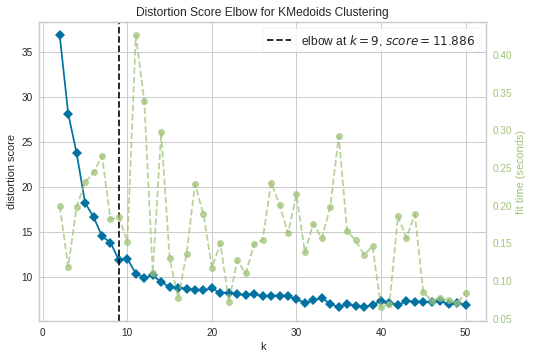

In [ ]:
# Use the elbow method to determine the optimal number of clusters

print('Elbow Method to determine the number of clusters to be formed:')
Elbow = KElbowVisualizer(KMedoids(), k=50)
Elbow.fit(scaled_df)
Elbow.show()

Silhouette Coefficient to determine the number of clusters to be formed:


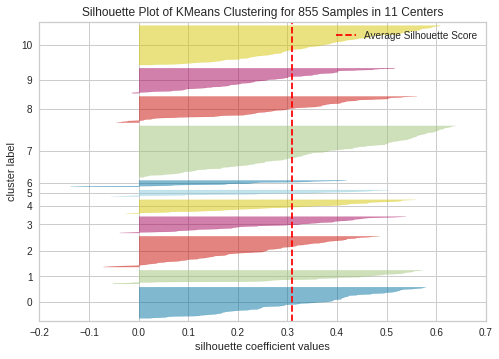

In [ ]:
# Use the silhouette coefficient to determine the optimal number of clusters

print('Silhouette Coefficient to determine the number of clusters to be formed:')
visualizer = SilhouetteVisualizer(KMeans(n_clusters=11), colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()

Intercluster Distance to visualize distance between clusters:


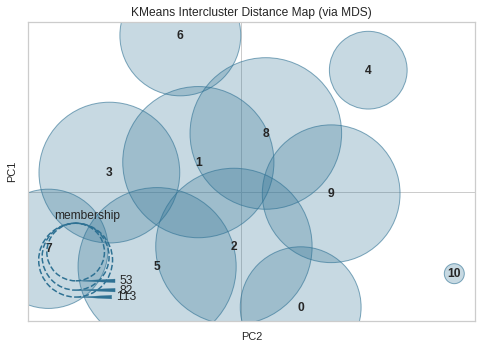

In [ ]:
# Visualize the distance between clusters

print('Intercluster Distance to visualize distance between clusters:')
inter_dis = InterclusterDistance(KMeans(n_clusters=11))
inter_dis.fit(scaled_df)
inter_dis.show()

In [ ]:
# Perform k-medoids clustering for various values of k and calculate the silhouette score for each

for i in range(8, 17, 1):
    kmedoids = KMedoids(n_clusters=i, method='pam', init='build', max_iter=500)
    clusters = kmedoids.fit_predict(scaled_df)
    print('Cluster k: ', i)
    print('Silhouette %s' % silhouette_score(scaled_df, kmedoids.labels_))

Cluster k:  8
Silhouette 0.28543973041688625
Cluster k:  9
Silhouette 0.26802162943849056
Cluster k:  10
Silhouette 0.24714589760934566
Cluster k:  11
Silhouette 0.2557349161177897
Cluster k:  12
Silhouette 0.27060786766135264
Cluster k:  13
Silhouette 0.27552953571373245
Cluster k:  14
Silhouette 0.2708978749851258
Cluster k:  15
Silhouette 0.26950686709632854
Cluster k:  16
Silhouette 0.26520300565734856


In [ ]:
# Perform k-medoids clustering with the optimal number of clusters

kmedoids = KMedoids(n_clusters=8, method='pam', init='build', max_iter=500)
clusters = kmedoids.fit_predict(scaled_df)
df_original["Clusters"]= clusters

In [ ]:
# Print the silhouette score of the final clustering

print('Silhouette %s' % silhouette_score(scaled_df, kmedoids.labels_))

Silhouette 0.28543973041688625


In [ ]:
# Print the size of each cluster

hist, bins = np.histogram(kmedoids.labels_, bins=range(0, len(set(kmedoids.labels_)) + 1))
sizes = dict(zip(bins, hist))

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(scaled_df)))

Cluster 0: 233 (0.17)
Cluster 1: 186 (0.14)
Cluster 2: 196 (0.14)
Cluster 3: 148 (0.11)
Cluster 4: 83 (0.06)
Cluster 5: 150 (0.11)
Cluster 6: 167 (0.12)
Cluster 7: 193 (0.14)


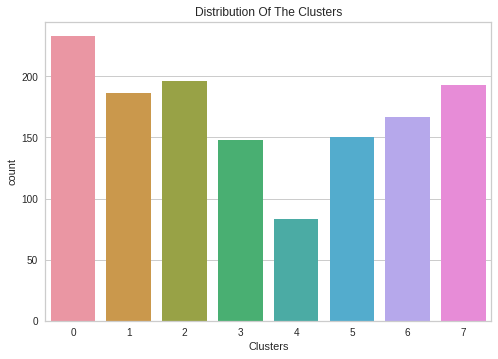

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df_original["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
df_original.head()

,R,G,B,Clusters
Name,,,,
'Askos' Verdeca 2021'.png,158.464062,151.671911,112.879860,3
003 Pecorino 2019'.png,178.381479,162.374293,141.791283,2
010 Lugana 2020'.png,140.607295,134.573145,130.236478,6
12 e Mezzo Malvasia del Salento 2020'.png,194.687512,188.969268,172.632524,4
40 Quarantanni Riserva Bianco 2018'.png,149.290191,147.933839,144.279314,6


In [ ]:
# Order rows on cluester labels

df_sort = df_original.sort_values(by=['Clusters','R','G', 'B'], ascending=[True, True, True, True])
df_sort

,R,G,B,Clusters
Name,,,,
Cala Reale Vermentino di Sardegna 2020'.png,126.909355,143.922106,114.483409,0
Afix Riesling 2018'.png,127.558522,141.091946,117.571639,0
Pfefferer 2021'.png,127.785712,152.852075,111.693769,0
Sodevo Pinot Grigio 2019'.png,131.531576,133.591610,119.134028,0
Praepositus Sylvaner 2019'.png,134.548457,131.276696,118.635965,0
...,...,...,...,...
Criseo 2019'.png,167.883853,131.938711,72.357961,7
Moscadello di Montalcino 2019'.png,169.227692,133.429601,80.935513,7
Arboreus Umbria Bianco 2015'.png,174.553288,131.441478,70.777599,7


In [ ]:
df_stats = df_sort.groupby('Clusters').agg(
    max_R=('R', np.max),
    min_R=('R', np.min),
    avg_R=('R', np.mean),
    max_G=('G', np.max),
    min_G=('G', np.min),
    avg_G=('G', np.mean),
    max_B=('B', np.max),
    min_B=('B', np.min),
    avg_B=('B', np.mean)
)

df_stats

,max_R,min_R,avg_R,max_G,min_G,avg_G,max_B,min_B,avg_B
Clusters,,,,,,,,,
0,167.562716,126.909355,150.711533,155.261859,127.620626,140.720878,130.636261,107.853247,120.214763
1,142.238783,77.622465,124.655831,139.759181,87.813684,119.485648,132.121765,87.675314,109.543541
2,194.634796,142.036333,165.186404,176.289379,142.394428,157.225398,164.107654,120.632834,136.823216
3,201.470078,145.181131,170.872224,183.384905,133.053609,153.074767,122.161875,73.877562,106.851499
4,219.453492,161.270011,190.535840,205.185858,162.372025,181.428620,188.587690,127.773375,155.576081
5,173.450742,17.017579,111.971411,134.929923,42.962100,99.933209,110.876547,28.262201,81.576108
6,153.678274,99.895026,138.586252,157.305924,118.997188,138.417662,171.568001,121.380216,135.532937
7,184.673066,129.361782,147.857621,146.281893,113.762493,130.352824,112.772993,57.628492,97.168323


In [ ]:
df_original = df_original.reset_index()
df_original.head()
df_original.to_csv('path/to/folder/df_whites_cluster.csv', index=False)

In [ ]:
df_original.groupby('Clusters').count()

,Name,R,G,B
Clusters,,,,
0,233,233,233,233
1,186,186,186,186
2,196,196,196,196
3,148,148,148,148
4,83,83,83,83
5,150,150,150,150
6,167,167,167,167
7,193,193,193,193


In [ ]:
filenames_full = df_original['Name'].unique()
filenames_full[:10]

array(["'Askos' Verdeca 2021'.png", "003 Pecorino 2019'.png",
       "010 Lugana 2020'.png",
       "12 e Mezzo Malvasia del Salento 2020'.png",
       "40 Quarantanni Riserva Bianco 2018'.png",
       "448 s.l.m. Bianco 2020'.png", "496 Bio 2019'.png",
       "90+10 Il Rivale 2019'.png", "A Demûa Bianco 2016'.png",
       "A'Puddara Etna Bianco 2019'.png"], dtype=object)

In [ ]:
kmedoids.labels_[:10]

array([3, 2, 6, 4, 6, 0, 6, 0, 2, 1])

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames_full,kmedoids.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
from skimage import io

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to n images to be shown at a time
    if len(files) > 11:
        print(f"Clipping cluster size from {len(files)} to 10")
        files = files[:10]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = io.imread(file)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 233 to 10


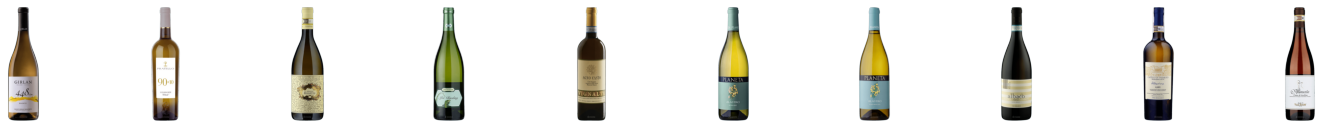

In [ ]:
view_cluster(0)

In [ ]:
kmedoids.cluster_centers_

array([[0.66158845, 0.60166407, 0.5743144 ],
       [0.5289993 , 0.47407569, 0.5054307 ],
       [0.73356206, 0.69526635, 0.66945681],
       [0.75520222, 0.66239021, 0.49720542],
       [0.86175402, 0.8496789 , 0.79465116],
       [0.47874327, 0.36278484, 0.35483405],
       [0.60682629, 0.59218693, 0.6590013 ],
       [0.63610406, 0.54354765, 0.45242905]])

In [ ]:
kmedoids.medoid_indices_

array([ 550,  842,  128,  330, 1330,  656, 1169,  522])

### Medoids wines

In [ ]:
for i in kmedoids.medoid_indices_:
  pd.set_option('display.max_colwidth', None) # don't cut too long names
  print(df_original[['Name', 'Clusters']].iloc[i])
  print('-'*85)

Name        Insolia 2020'.png
Clusters                    0
Name: 550, dtype: object
-------------------------------------------------------------------------------------
Name        Passolento Castelli di Jesi 2018'.png
Clusters                                        1
Name: 842, dtype: object
-------------------------------------------------------------------------------------
Name        Bine Longhe di Costalta 2018'.png
Clusters                                    2
Name: 128, dtype: object
-------------------------------------------------------------------------------------
Name        Drago Bianco 2016'.png
Clusters                         3
Name: 330, dtype: object
-------------------------------------------------------------------------------------
Name        Vivia Maremma Toscana 2020'.png
Clusters                                  4
Name: 1330, dtype: object
-------------------------------------------------------------------------------------
Name        Lidia Chardonnay 2018'